# FashionMNIST prediction using a basic neural network

In [ ]:
# Importing important libraries
import numpy as np
import torch
import torchvision

Downloading the MNIST fashion data

In [ ]:
trainingdata = torchvision.datasets.FashionMNIST('./FashionMNIST/',train=True,download=True,transform=torchvision.transforms.ToTensor())
testdata = torchvision.datasets.FashionMNIST('./FashionMNIST/',train=False,download=True,transform=torchvision.transforms.ToTensor())


100%|██████████| 26421880/26421880 [00:02<00:00, 10022003.18it/s]


Extracting ./FashionMNIST/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./FashionMNIST/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 170693.64it/s]


Extracting ./FashionMNIST/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./FashionMNIST/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3173934.78it/s]


Extracting ./FashionMNIST/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./FashionMNIST/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 20862103.37it/s]

Extracting ./FashionMNIST/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./FashionMNIST/FashionMNIST/raw



In [ ]:
print(len(trainingdata))
print(len(testdata))

60000
10000


Characteristics of the input image (all dimensions):

In [ ]:
image, label = trainingdata[0]
print(image.shape, label)

torch.Size([1, 28, 28]) 9


We use the squeeze function to get rid of the first dimension. :

In [ ]:
print(image.squeeze().shape)

torch.Size([28, 28])


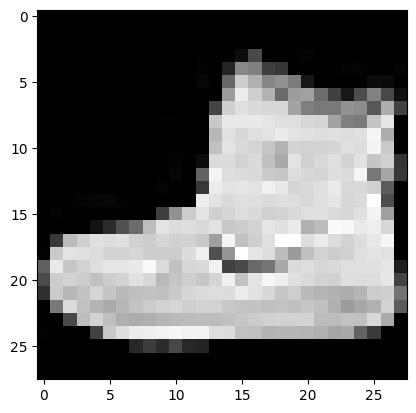

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(image.squeeze(), cmap=plt.cm.gray)

In [ ]:
trainDataLoader = torch.utils.data.DataLoader(trainingdata,batch_size=64,shuffle=True)
testDataLoader = torch.utils.data.DataLoader(testdata,batch_size=64,shuffle=False)

Let's also check the length of the train and test dataloader

In [ ]:
print(len(trainDataLoader))
print(len(testDataLoader))

938
157


Below are some images from our training dataset along with  the true labels. T-shirt/top - 0 Trouser - 1 Pullover - 2, Dress - 3, Coat - 4, Sandal - 5 Shirt - 6 Sneaker- 7 Bag - 8 Ankle boot - 9

:

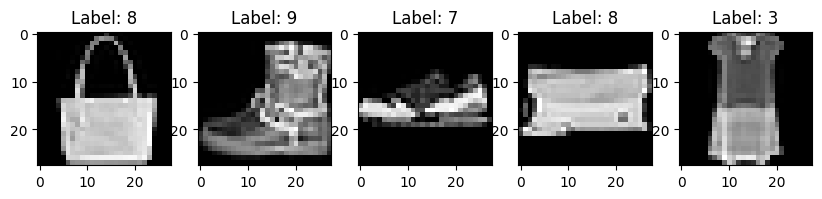

In [ ]:
images, labels = next(iter(trainDataLoader))

plt.figure(figsize=(10,4))
for index in np.arange(0,5):
  plt.subplot(1,5,index+1)
  plt.title(f'Label: {labels[index].item()}')
  plt.imshow(images[index].squeeze(),cmap=plt.cm.gray)

Now let's set up our model.

# Defining the neural network

We define the neural network as desired in the question.

The first hidden layer takes a 28*28 input, and has 256 neurons. The second hidden layer takes these 256 inputs and has 128 neurons, thus producing 128 outputs. The last hidden layer takes these 128 inputs and has 64 neurons, therefore 64 outputs.

The last (output) layer has 10 outputs, corresponding to the 10 labels in the MNIST dataset i.e.:
T-shirt/top,
Trouser,
Pullover,
Dress,
Coat,
Sandal,
Shirt,
Sneaker,
Bag, and
Ankle boot.


As desired in the question, relu activation functions have been defined at every layer in our forward() function.

In [ ]:
class New_Dense_Network(torch.nn.Module):
    def __init__(self):
        super(New_Dense_Network, self).__init__()
        self.hidden_layer_1 = torch.nn.Linear(28*28, 256)
        self.hidden_layer_2 = torch.nn.Linear(256, 128)
        self.hidden_layer_3 = torch.nn.Linear(128, 64)
        self.output_layer = torch.nn.Linear(64, 10)
        self.relu = torch.nn.ReLU()

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = self.relu(self.hidden_layer_1(x))
        x = self.relu(self.hidden_layer_2(x))
        x = self.relu(self.hidden_layer_3(x))
        x = self.output_layer(x)
        return x

Now let's train our model!

# EPOCH number choice

I trained the models with 20 epochs, just like the demo. I thought increasing the number of epochs would increase the accuracy (maybe), so i trained the model over 35 epochs. However, I saw a peak at 29/30 epochs and thus chose to keep my model trained at 30 epochs.



# Test Accuracy

I retrieved the total number of correct (true negatives and positives) predictions and appended a new array, test_accuracy_history , at every epoch.

In [ ]:
model = New_Dense_Network().cuda() #loading our new model
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

train_loss_history = []
test_loss_history = []
test_accuracy_history = []


for epoch in range(30):
    train_loss = 0.0
    test_loss = 0.0
    correct_labels = 0
    total = 0

    model.train()
    for i, data in enumerate(trainDataLoader):
        images, labels = data
        images = images.cuda()
        labels = labels.cuda()
        optimizer.zero_grad()
        predicted_output = model(images)
        fit = loss(predicted_output, labels)
        fit.backward()
        optimizer.step()
        train_loss += fit.item()

    model.eval()
    for i, data in enumerate(testDataLoader):
        with torch.no_grad():
            images, labels = data
            images = images.cuda()
            labels = labels.cuda()
            predicted_output = model(images)
            fit = loss(predicted_output, labels)
            test_loss += fit.item()
            _, predicted = torch.max(predicted_output, 1)
            total += labels.size(0)
            correct_labels += (predicted == labels).sum().item()

    train_loss = train_loss / len(trainDataLoader)
    test_loss = test_loss / len(testDataLoader)
    test_accuracy = correct_labels / total
    train_loss_history += [train_loss]
    test_loss_history += [test_loss]
    test_accuracy_history += [test_accuracy]
    test_accuracy_history.append(test_accuracy)
    print(f'Epoch {epoch}, Train loss {train_loss}, Test loss {test_loss}, Test accuracy {test_accuracy}')


Epoch 0, Train loss 1.8653960180943454, Test loss 1.0927115648415437, Test accuracy 0.6102
Epoch 1, Train loss 0.8410240818442566, Test loss 0.7308542859402432, Test accuracy 0.7393
Epoch 2, Train loss 0.6592642420581155, Test loss 0.6488540550326086, Test accuracy 0.7699
Epoch 3, Train loss 0.5862462328695285, Test loss 0.6341750682539241, Test accuracy 0.7688
Epoch 4, Train loss 0.5410707867952552, Test loss 0.5640777315303778, Test accuracy 0.7986
Epoch 5, Train loss 0.5104423797429244, Test loss 0.5137617103992753, Test accuracy 0.8176
Epoch 6, Train loss 0.4850423803239235, Test loss 0.5043912964641668, Test accuracy 0.8217
Epoch 7, Train loss 0.46477465971764215, Test loss 0.49199072323786985, Test accuracy 0.8223
Epoch 8, Train loss 0.4488295246320747, Test loss 0.47844716109287966, Test accuracy 0.829
Epoch 9, Train loss 0.4346655443755548, Test loss 0.46869131514600887, Test accuracy 0.8368
Epoch 10, Train loss 0.42131945273197535, Test loss 0.4644068869625687, Test accuracy 0

As we can see, the accuracy is now 87.17%, which is pretty good.

Let's plot our loss by training epoch to see how we did.

Since we have 30 epochs now, the X axis range is 0 to 30.





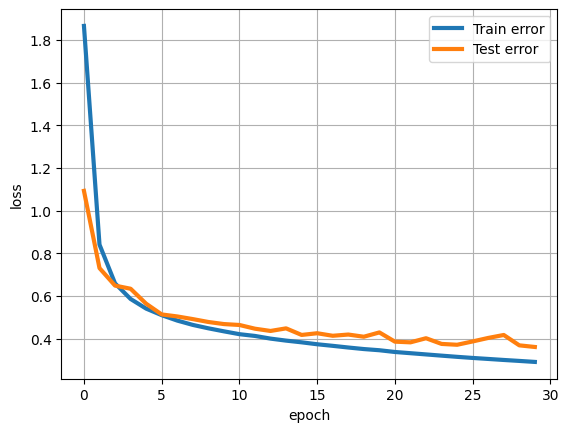

In [ ]:
plt.plot(range(30),train_loss_history,'-',linewidth=3,label='Train error')
plt.plot(range(30),test_loss_history,'-',linewidth=3,label='Test error')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.grid(True)
plt.legend()
plt.show()

Now for the labels and predicted labels.

In [ ]:
predicted_outputs = model(images)
predicted_classes = torch.max(predicted_outputs, 1)[1]
print('Predicted:', predicted_classes)
fit = loss(predicted_output, labels)
print('True labels:', labels)
print(fit.item())

Predicted: tensor([3, 1, 7, 5, 8, 4, 5, 6, 8, 9, 1, 9, 1, 8, 1, 5], device='cuda:0')
True labels: tensor([3, 2, 7, 5, 8, 4, 5, 6, 8, 9, 1, 9, 1, 8, 1, 5], device='cuda:0')
0.16433967649936676


# Predicted v/s true label loss

We can see that the prediction loss using this model has decreased by half compared to 0.322, the prediction loss for our previous model based on linear regression.

Except for 1 sample out of the 16 samples in this batch of 16 images, the others are predicted correctly.

Therefore, converting this model into a Dense Neural Network helped us increase accuracy and decrease prediction loss.

# LABELS

T-shirt/top - 0
Trouser - 1
Pullover - 2,
Dress - 3,
Coat - 4,
Sandal - 5
Shirt - 6
Sneaker- 7
Bag - 8
Ankle boot - 9

So total 10 classes

Text(0.5, 1.0, 'Pred: 1, True: 2')

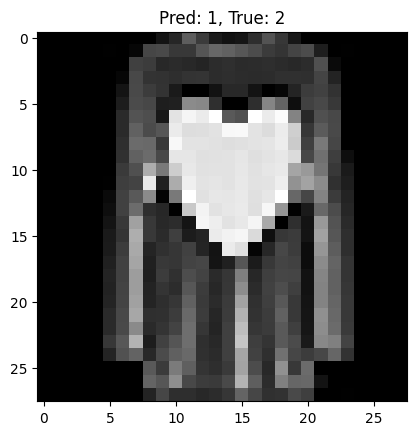

In [ ]:
plt.imshow(images[1].squeeze().cpu(), cmap=plt.cm.gray)
plt.title(f'Pred: {predicted_classes[1].item()}, True: {labels[1].item()}')

# Explanation for prediction - 1





Here, we can see that out model predicts that this is a Trouser (predicted label: class 1), but it is actually a pullover (true label: class 2). Intuitively, we can agree that the model might've made this mistake because the portion from X axis 7 to 20 (approximately) does have features of a trouser.

Text(0.5, 1.0, 'Pred: 5, True: 5')

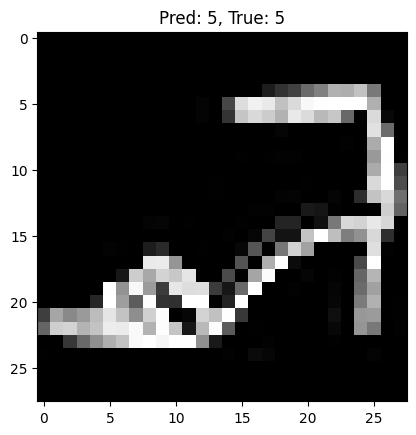

In [ ]:
plt.imshow(images[3].squeeze().cpu(), cmap=plt.cm.gray)
plt.title(f'Pred: {predicted_classes[3].item()}, True: {labels[3].item()}')

# Explanation for prediction - 2





Here, we can see that out model predicts that this is a Sandal (predicted label: class 5), and it is actually a Sandal (true label: class 5). In this case, our model did a good job.

Text(0.5, 1.0, 'Pred: 1, True: 1')

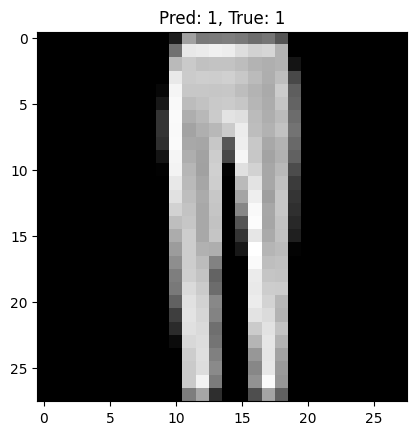

In [ ]:
plt.imshow(images[10].squeeze().cpu(), cmap=plt.cm.gray)
plt.title(f'Pred: {predicted_classes[10].item()}, True: {labels[10].item()}')

# Explanation for prediction - 3





Here, we can see that out model predicts that this is a Trouser (predicted label: class 1), and it is actually a Trouser (true label: class 1). In this case too, our model did a good job.

--------------

--------------

--------------

--------------

--------------

--------------

--------------

--------------

--------------

--------------